# 线性关系可视化

许多数据集有多个定量变量，数据分析的目标就是找出变量之间的关系。之前的章节通过显示两个变量的联合分布来实现这个目标。但是使用统计模型来估计包含噪声的观测值之间的关系是非常有用的。本章讨论的绘图函数都是在线性回归的框架下实现的。

在seaborn中，回归图的主要目的是在探索性分析中从视觉上强调数据集上观测值之间关系。因此它本身并不是一个统计分析软件包。seaborn的主要用途是从视觉角度快速简单地实现数据分析。

In [4]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set(color_codes=True)
tips = sns.load_dataset("tips")

## 线性回归模型的绘图函数

在seaborn中主要使用regplot和lmplot两个件数来绘制线性回归关系。这两个函数的核心功能非常相似，理解他们之间的不同才能根据任务选择合适的函数。

简单的调用这两个函数时，两个函数都会绘制两个变量的散点图，同时拟合y和x的回归直线，并且绘制处95%的置信区间。

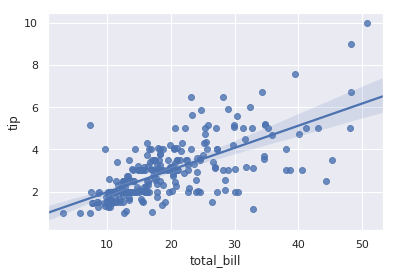

In [7]:
sns.regplot(x="total_bill", y="tip", data=tips)

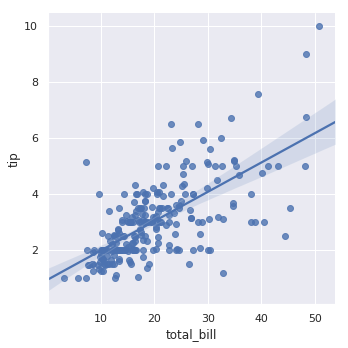

In [8]:
sns.lmplot(x="total_bill", y="tip", data=tips)

除了图像的形状不同，以上两个图时完全一行的。但是，regplot函数可以接受不同形式的x/y值，包括 numpy的array、pandas的Series、以及传递给data参数中的DataFrame的变量。但是，lmplot中的data参数时必须的，并且x/y必须时字符串。

如果其中一个变量时离散的数值，也可以你拟合回归线。但是，通常散点图时更好的选择。

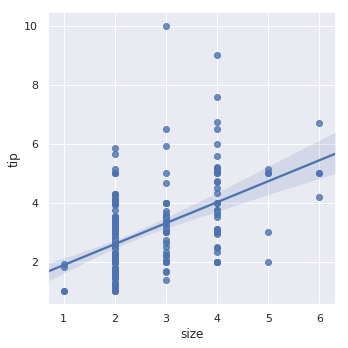

In [9]:
sns.lmplot(x="size", y="tip", data=tips)

一种选择是将一些随机噪声（“抖动”）添加到离散值中，使这些值的分布更加清晰。需要说明的是抖动仅适用于散点图数据，并不影响回归线的拟合。

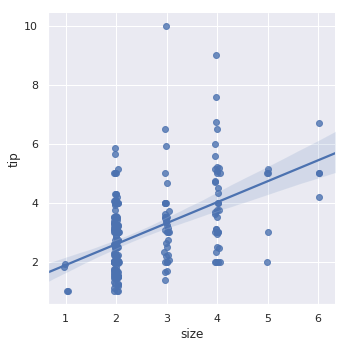

In [10]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

另一种选择是在离散的区间上估计数据的中心趋势和置信区间。

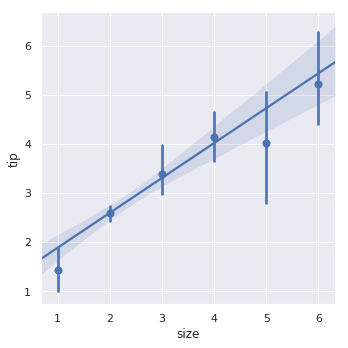

In [12]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

## 拟合各种各样的模型

线性回归模型不一定适合所有的数据集。下面两个例子中，第一个数据集非常适合使用线性回归模型，但第二例子中，线性模型显然不是一个很好的选择。

In [15]:
anscombe = sns.load_dataset("anscombe")

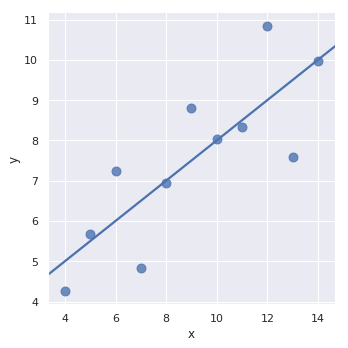

In [16]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),ci=None, scatter_kws={"s": 80})

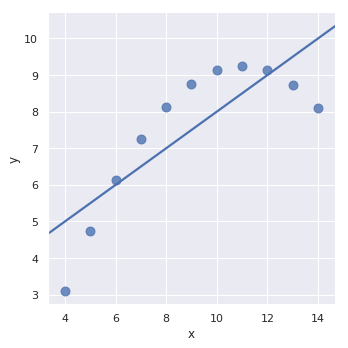

In [17]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),ci=None, scatter_kws={"s": 80})

lmplot()和regplot()函数可以使用多项式回归模型来探索变量之间的非线性关系

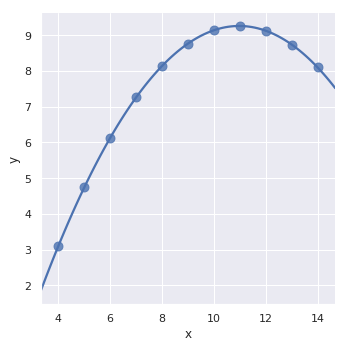

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),order=2, ci=None, scatter_kws={"s": 80})

除了非线性关系，离群点也会影响线性回归的拟合效果。

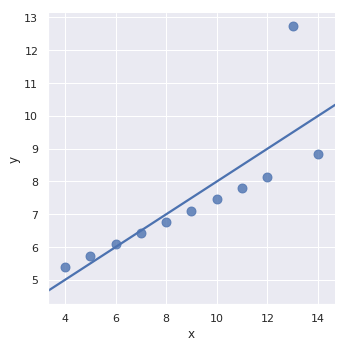

In [20]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),ci=None, scatter_kws={"s": 80})

为了消除离群点的影响，启用robust参数可以使用不同的损失函数来降低相对较大的残差影响。

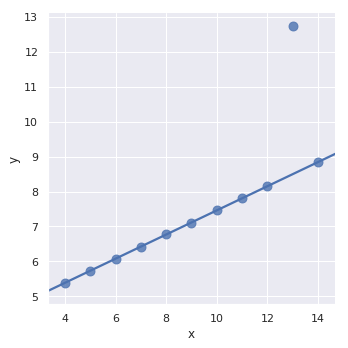

In [21]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),robust=True, ci=None, scatter_kws={"s": 80})

对于二值化的y值，简单的线性回归虽然依然有效，但是拟合的结果看起来不合乎常理

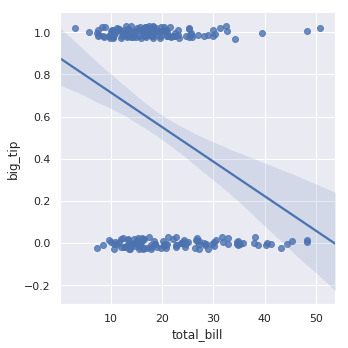

In [22]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,y_jitter=.03)

解决的方法时使用逻辑斯蒂回归，该直线拟合的y值表示给定x的情况下y=1的概率。

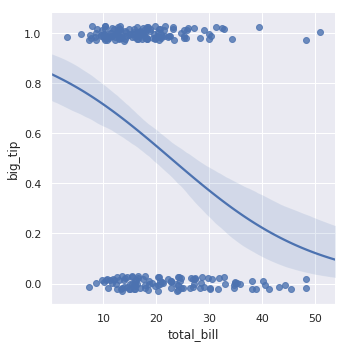

In [23]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03)

需要注意的是逻辑斯蒂回归计算量较大，可以通过设置ci=None来禁用置信区间的估计。

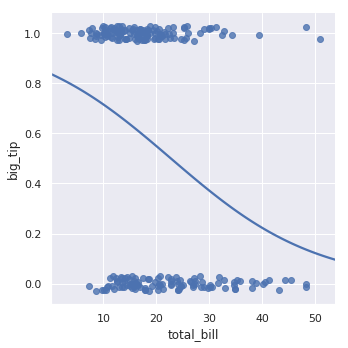

In [25]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, ci = None,y_jitter=.03)

另一种方式时使用lowess smoother拟合非参数回归。这种方法具有最少的假设，因为是计算密集型的，所以不会计算置信区间。

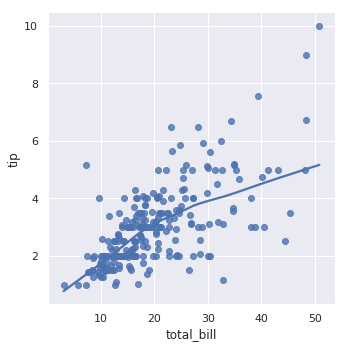

In [27]:
sns.lmplot(x="total_bill", y="tip", data=tips,lowess=True)

residplot()函数用于检查回归模型是否适合数据集。它仅绘制观测值的残差，理想情况下残差点应该随机分布在y=0直线的两侧。

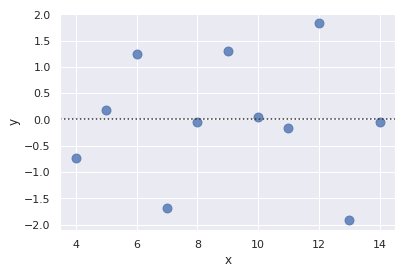

In [28]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),scatter_kws={"s": 80})

如果残差具有某种规律，说明它该回归模型并不适合该数据集。

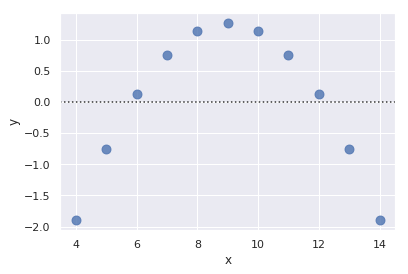

In [29]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),scatter_kws={"s": 80})

## 其它条件的变量化

regplot函数通常用于绘制一对变量之间的关系。lmplot函数结合了regplot和FaceGird的功能，提供了一种简单的接口来绘制两个变量的回归关系随第三个变量的变化。

最简单的方式就是在同一个图形中通过不同的颜色来区分不同级别的关系。

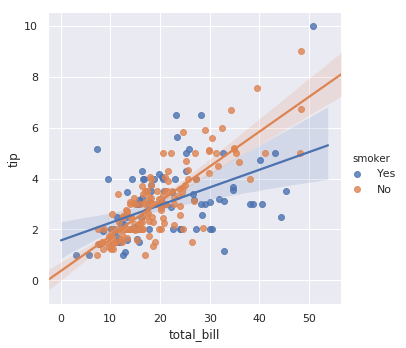

In [30]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

除了使用颜色之外，对于其中的散点图还可以使用不同的形状。

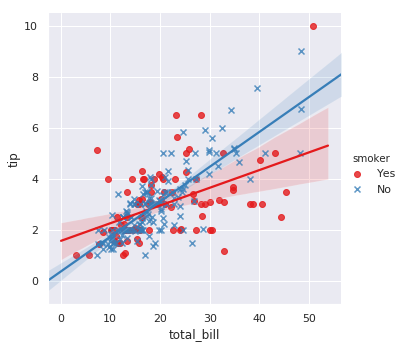

In [32]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,markers=["o", "x"], palette="Set1")

除了在同一个图形中使用不同的颜色或者样式来区分，也可以使用多个图形。

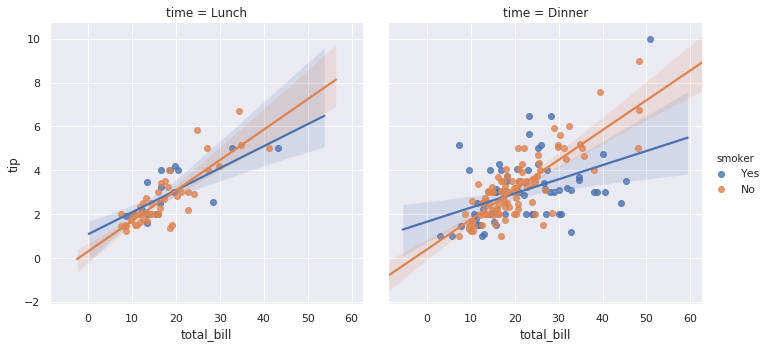

In [33]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

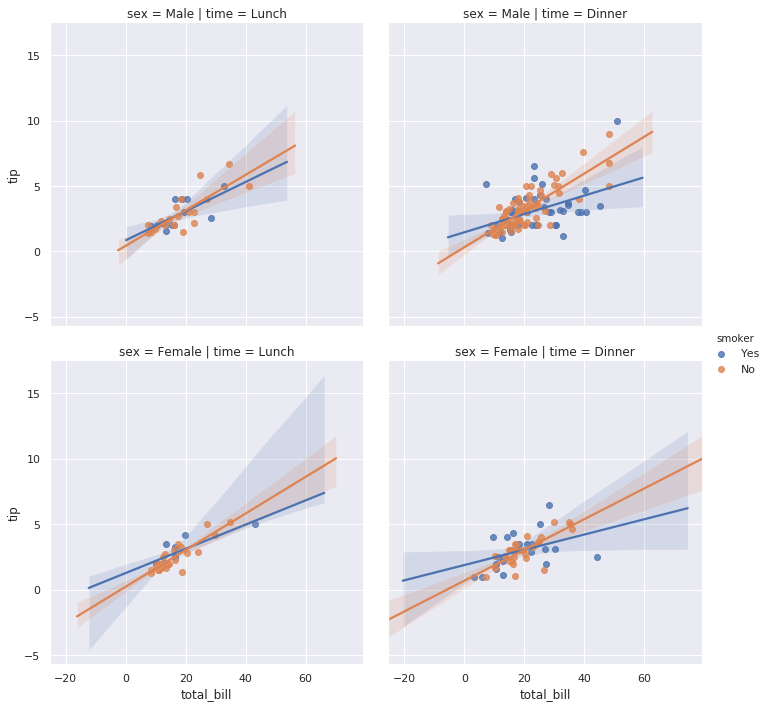

In [34]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips)

## 图形大小和形状的设置

regplot是一个axes-level函数，通过matplotlib设置axes的大小，并将其作为参数传递给regplot函数实现图形的形状和大小设置。

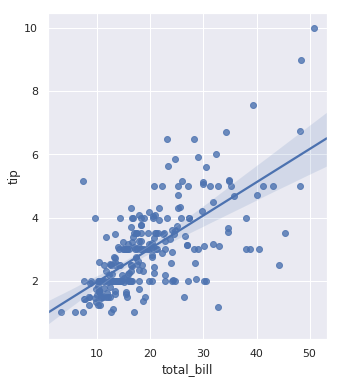

In [36]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

lmplot是一个figure-level函数，通过size和aspect参数可以控制Facegrid中每一个子图的大小。

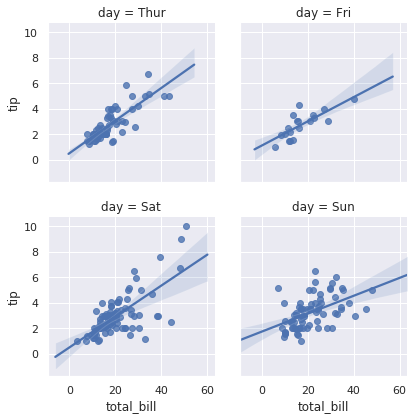

In [37]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,col_wrap=2, height=3)

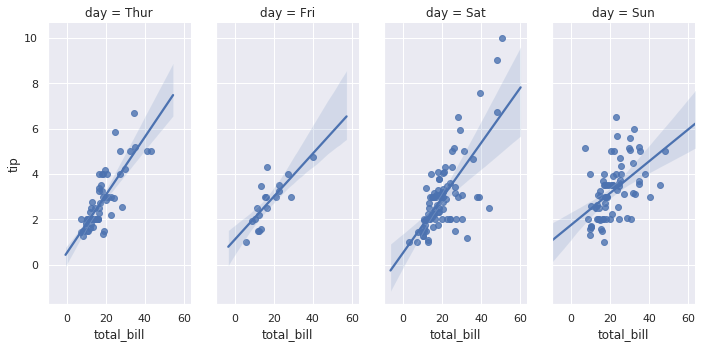

In [38]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,aspect=.5)

## 在其他上下文环境中绘制回归图

在joinplot中绘制回归线

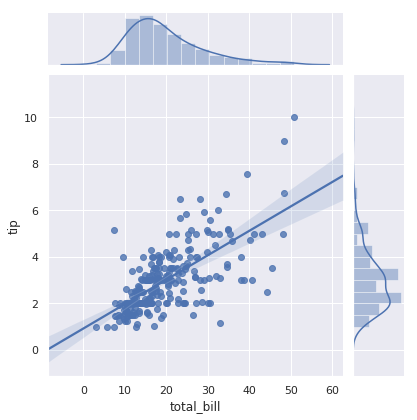

In [40]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

在pairplot中也可以绘制回归执行。与lmplot的不同是，parplot绘制的是多个变量两两之间的回归关系，而不是一对变量随第三个分类变量的变化关系。

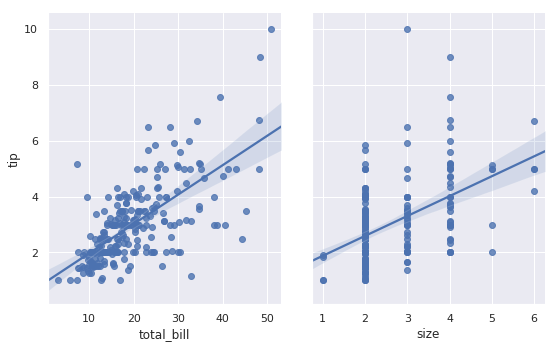

In [41]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],height=5, aspect=.8, kind="reg")

与lmplot类似，但与joinplot不同，pairplot中每个子图也可绘制一对变量随第三个变量的变化关系。

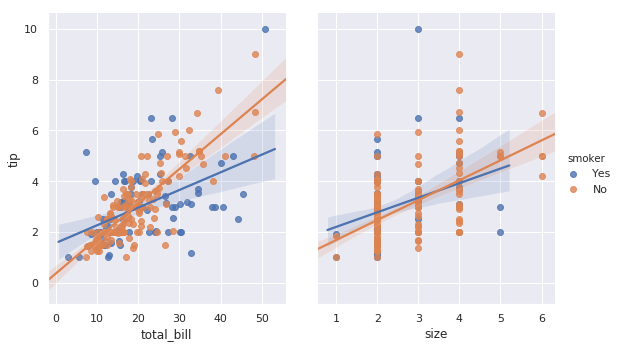

In [42]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],hue="smoker", height=5, aspect=.8, kind="reg")